In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [30]:
df = pd.read_csv('./datasets/electricity.csv')
df.head(10)

C:\Users\Ashwin\AppData\Local\Temp\ipykernel_4204\4204473640.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('electricity.csv')


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87
5,01/11/2011 02:30,NaN,0,1,44,1,11,2011,5,342.97,2810.01,33.75,5.00,11.10,562.61,342.00,2585.99,39.87
6,01/11/2011 03:00,NaN,0,1,44,1,11,2011,6,343.18,2780.52,33.75,5.00,7.40,545.81,336.00,2561.70,39.87
7,01/11/2011 03:30,NaN,0,1,44,1,11,2011,7,343.46,2762.67,33.75,5.00,9.30,539.38,338.00,2544.33,39.87
8,01/11/2011 04:00,NaN,0,1,44,1,11,2011,8,343.88,2766.63,33.75,4.00,11.10,538.70,347.00,2549.02,39.87
9,01/11/2011 04:30,NaN,0,1,44,1,11,2011,9,344.39,2786.80,33.75,4.00,7.40,540.39,338.00,2547.15,39.87


In [31]:
df.columns

Index(['DateTime', 'Holiday', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day',
       'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [33]:
df.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000


In [34]:
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [35]:
df["DateTime"] = pd.to_datetime(df["DateTime"], format="mixed")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 1536 non-null   object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  38014 non-null  object        
 10  SystemLoadEA            38014 non-null  object        
 11  SMPEA                   38014 non-null  object        
 12  ORKTemperature          38014 non-null  object

In [36]:
df["DateTime"].head(10)

0   2011-01-11 00:00:00
1   2011-01-11 00:30:00
2   2011-01-11 01:00:00
3   2011-01-11 01:30:00
4   2011-01-11 02:00:00
5   2011-01-11 02:30:00
6   2011-01-11 03:00:00
7   2011-01-11 03:30:00
8   2011-01-11 04:00:00
9   2011-01-11 04:30:00
Name: DateTime, dtype: datetime64[ns]

In [37]:
df['Holiday'].unique()

array([nan, 'Christmas Eve', 'Christmas', "St Stephen's Day",
       "New Year's Eve", "New Year's Day", "St Patrick's Day",
       'Good Friday', 'Holy Saturday', 'Easter', 'Easter Monday',
       'May Day', 'June Bank Holiday', 'August Bank Holiday',
       'October Bank Holiday'], dtype=object)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 1536 non-null   object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  38014 non-null  object        
 10  SystemLoadEA            38014 non-null  object        
 11  SMPEA                   38014 non-null  object        
 12  ORKTemperature          38014 non-null  object

In [39]:
df_columns = df.columns[9:]
df_columns

Index(['ForecastWindProduction', 'SystemLoadEA', 'SMPEA', 'ORKTemperature',
       'ORKWindspeed', 'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2',
       'SMPEP2'],
      dtype='object')

In [40]:
for column in df_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 1536 non-null   object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  38009 non-null  float64       
 10  SystemLoadEA            38012 non-null  float64       
 11  SMPEA                   38012 non-null  float64       
 12  ORKTemperature          37719 non-null  float6

In [41]:
df.isnull().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        5
SystemLoadEA                  2
SMPEA                         2
ORKTemperature              295
ORKWindspeed                299
CO2Intensity                  7
ActualWindProduction          5
SystemLoadEP2                 2
SMPEP2                        2
dtype: int64

In [42]:
df = df.drop(['Holiday'], axis=1)
df.isnull().sum()

DateTime                    0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [43]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37682 entries, 0 to 38013
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                37682 non-null  datetime64[ns]
 1   HolidayFlag             37682 non-null  int64         
 2   DayOfWeek               37682 non-null  int64         
 3   WeekOfYear              37682 non-null  int64         
 4   Day                     37682 non-null  int64         
 5   Month                   37682 non-null  int64         
 6   Year                    37682 non-null  int64         
 7   PeriodOfDay             37682 non-null  int64         
 8   ForecastWindProduction  37682 non-null  float64       
 9   SystemLoadEA            37682 non-null  float64       
 10  SMPEA                   37682 non-null  float64       
 11  ORKTemperature          37682 non-null  float64       
 12  ORKWindspeed            37682 non-null  float64    

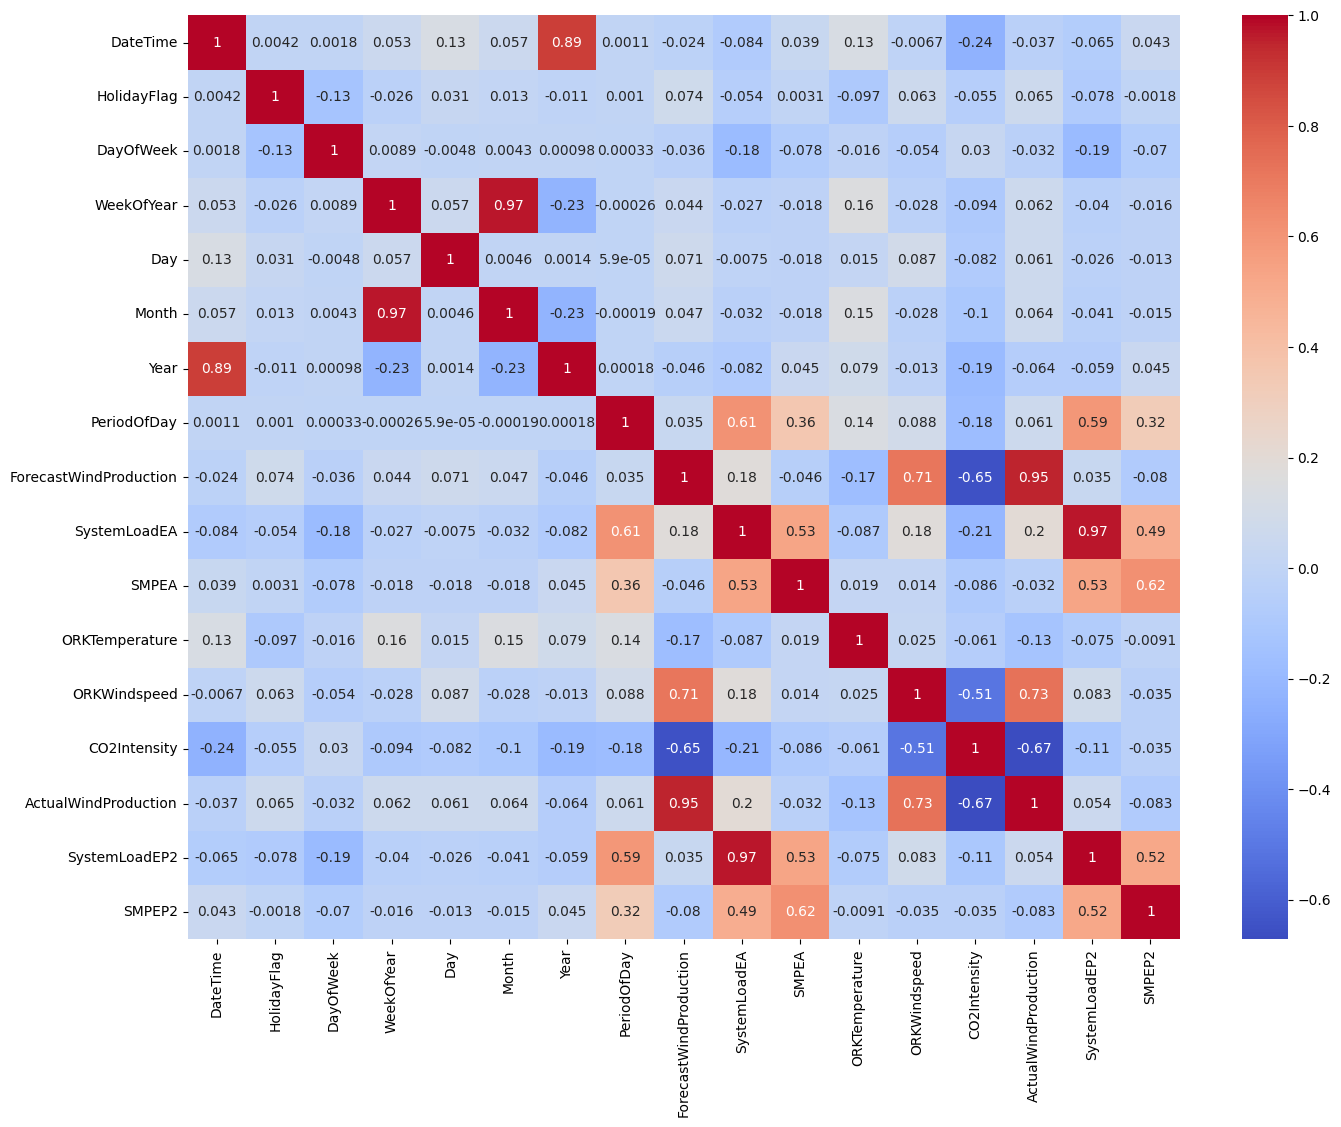

In [44]:
correlations = df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [45]:
df = df.drop(23193)

In [46]:
df = df.drop(df.columns[[0]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37681 entries, 0 to 38013
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HolidayFlag             37681 non-null  int64  
 1   DayOfWeek               37681 non-null  int64  
 2   WeekOfYear              37681 non-null  int64  
 3   Day                     37681 non-null  int64  
 4   Month                   37681 non-null  int64  
 5   Year                    37681 non-null  int64  
 6   PeriodOfDay             37681 non-null  int64  
 7   ForecastWindProduction  37681 non-null  float64
 8   SystemLoadEA            37681 non-null  float64
 9   SMPEA                   37681 non-null  float64
 10  ORKTemperature          37681 non-null  float64
 11  ORKWindspeed            37681 non-null  float64
 12  CO2Intensity            37681 non-null  float64
 13  ActualWindProduction    37681 non-null  float64
 14  SystemLoadEP2           37681 non-null  flo

In [47]:
X = df.drop('SMPEP2', axis=1).copy()
y = df['SMPEP2']

In [48]:
df_columns = df.columns[:-1]
df_columns

Index(['HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day', 'Month', 'Year',
       'PeriodOfDay', 'ForecastWindProduction', 'SystemLoadEA', 'SMPEA',
       'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
       'ActualWindProduction', 'SystemLoadEP2'],
      dtype='object')

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'regressor__n_estimators': n_estimators,
               'regressor__max_features': max_features,
               'regressor__max_depth': max_depth,
               'regressor__min_samples_split': min_samples_split,
               'regressor__min_samples_leaf': min_samples_leaf,
               'regressor__bootstrap': bootstrap}

In [50]:
numeric_features = df_columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features)
    ], remainder='passthrough')

In [51]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  Index(['HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day', 'Month', 'Year',
       'PeriodOfDay', 'ForecastWindProduction', 'SystemLoadEA', 'SMPEA',
       'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
       'ActualWindProduction', 'SystemLoadEP2'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [54]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [55]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [56]:
print(f'Train MSE: {mse_train:.4f}')
print(f'Test MSE: {mse_test:.4f}')
print(f'Train MAE: {mae_train:.4f}')
print(f'Test MAE: {mae_test:.4f}')
print(f'Train R^2: {r2_train:.4f}')
print(f'Test R^2: {r2_test:.4f}')

Train MSE: 62.6581
Test MSE: 482.6881
Train MAE: 3.2408
Test MAE: 9.0227
Train R^2: 0.9481
Test R^2: 0.6366


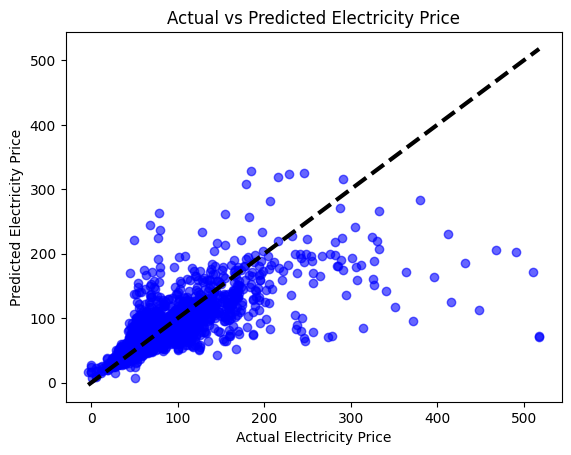

In [57]:
plt.figure()
plt.scatter(y_test, y_pred_test, alpha=0.6, color='b')
plt.xlabel('Actual Electricity Price')
plt.ylabel('Predicted Electricity Price')
plt.title('Actual vs Predicted Electricity Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()